# Proceso de Wiener (Movimiento Browniano)
---
Josué Juárez Morales

Definición. Un proceso estocástico $\{W(t),\, t \leq 0\}$ que cumple las siguientes propiedades:

- $W(0) = 0$;
- $\{W(t),\, t \leq 0\}$ tiene incrementos independientes;
- Para cualquier intervalo de tiempo $(t_{1}, t_{2})$, $W(t_{2}) - W(t_{1})$ tiene una distribución normal con media cero y varianza $\sigma^{2}(t_{2} - t_{1})$.

recibe el nombre de Proceso de Wiener.

El caso $\sigma = 1$ ese llamado Proceso de Weiner estandarizado.

## Proceso de simulación

Dado un conjunto de índices $T = \{t_{0}=0, t_{1}, t_{2}, t_{3}, \ldots\}$
- Se genera un número aleatorio $x_{t_{1}}$ cuya distribución es $\mathcal{N}(0,t_{1})$;
- Se genera un número aleatorio $x_{t_{2}}$ cuya distribución es $\mathcal{N}(0,t_{2}-t_{1})$, luego $w_{t_{2}} = x_{t_{2}} + x_{t_{1}}$;
- Se genera un número aleatorio $x_{t_{3}}$ cuya distribución es $\mathcal{N}(0,t_{3}-t_{2})$, luego $w_{t_{3}} = x_{t_{3}} + w_{t_{2}} = x_{t_{3}} + x_{t_{2}} + x_{t_{1}}$;
- Continuando de esta forma se observa que $w_{t_{n}} = x_{t_{n}} +  x_{t_{n-1}} + x_{t_{n-2}} + \cdots + x_{t_{1}}$;
- La realización del proceso de Weiner es $\{w_{t_{1}}, w_{t_{2}}, w_{t_{3}}, \ldots \}$.

## Versión vectorizada

Como ejemplo consideramos intervalos de tiempo unitarios. Entonces la propiedad de incrementos independientes nos permite vectorizar el proceso de simulación; debido a que se puede generar el vector aleatorio cuyas entradas son números aleatorios con distribución $\mathcal{N}(0,1)$. Después las sumas acumuladas son directas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 1000
W = np.random.normal(0,1, N) #N números aleatorios
W = np.insert(W, 0, 0) #añadir X(0) = 0
W = np.cumsum(W) #suma acumulada

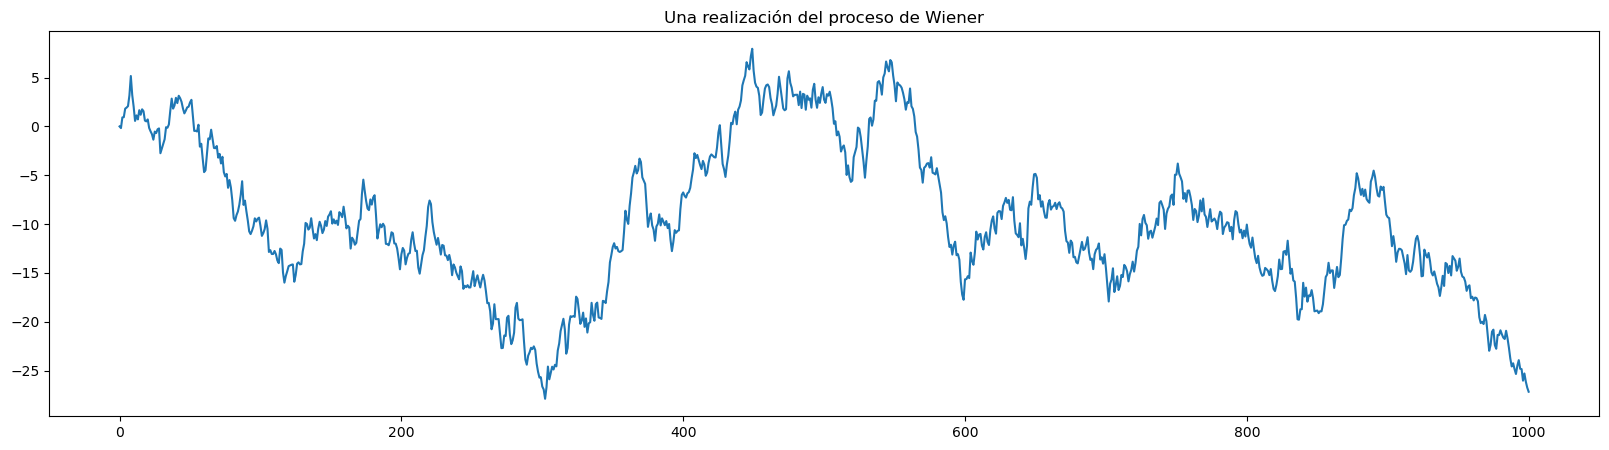

In [3]:
plt.figure(figsize=(20, 5))
plt.plot(W)
plt.title("Una realización del proceso de Wiener")
plt.show()

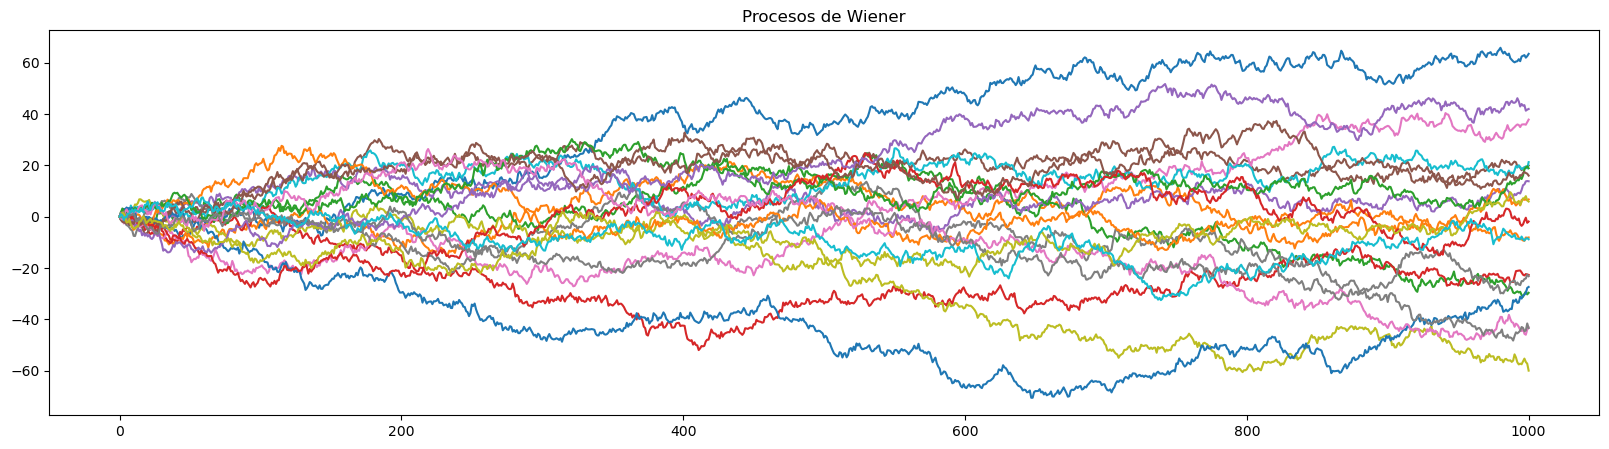

In [4]:
plt.figure(figsize=(20, 5))

for i in range(0,20): #20 simulaciones
    
    W = np.random.normal(0,1, N) 
    W = np.insert(W, 0, 0)
    W = np.cumsum(W)
    
    plt.plot(W)
    
plt.title("Procesos de Wiener")
plt.show()

## Simular hasta el punto $W(T),\, \, T > 0.$

In [5]:
# calcular hasta W(T) en n pasos
T = 10
n = 1000
t, dt = np.linspace(0,T,num=n,retstep=True) #genera n números igualmente separados (dt) en el intervalo [0,T]
print(dt)
#la lista t solamente es necesaria si se quiere escalar el eje x en la gráfica

0.01001001001001001


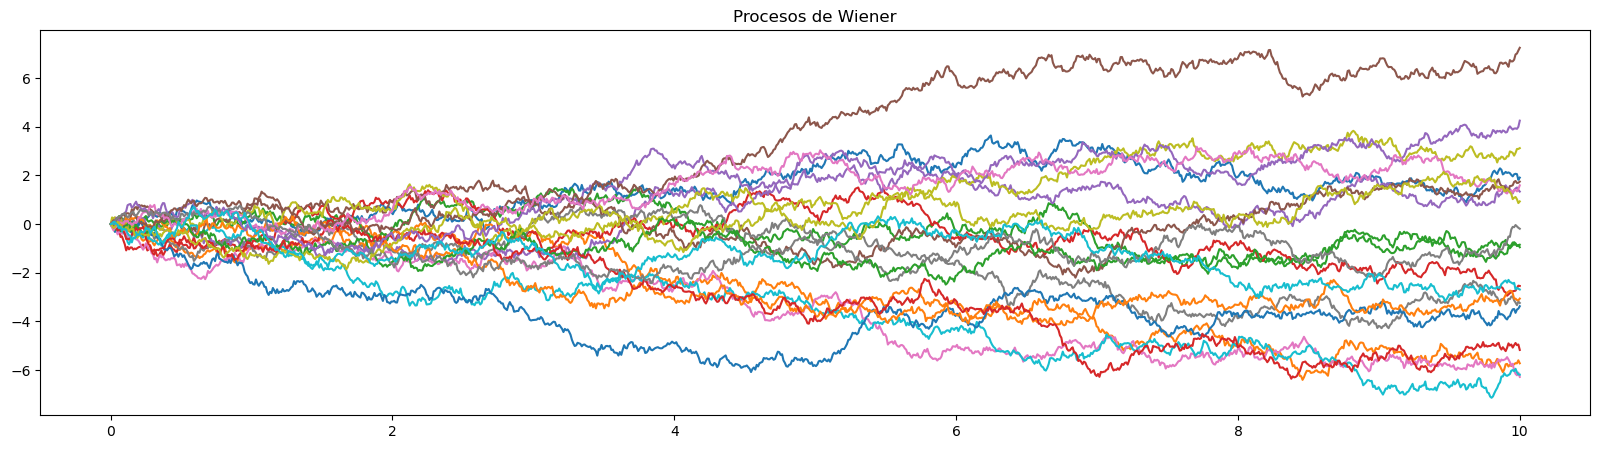

In [6]:
plt.figure(figsize=(20, 5))

for i in range(0,20): #20 simulaciones
    
    W = np.random.normal(0,np.sqrt(dt), n-1) 
    W = np.insert(W, 0, 0)
    W = np.cumsum(W)
    
    plt.plot(t,W)
    
    i += 1
    
plt.title("Procesos de Wiener")
plt.show()

## Versión $\{W(T)\}$ con partición arbitraria

Dada la partición
$t_0 =0 < t_1 < t_2 < \ldots < t_n = T$
generamos cada uno de los puntos $W(t_i)$ usando la función Wiener.

In [7]:
#genera la observación W(T) usando incrementos de tiempo de tamaño 1/10
def Wiener(T):
    if T <= 1/10:
        W = np.random.normal(0,np.sqrt(T))
    else:
        n = int(np.floor(10*T))
        X = np.random.normal(0,np.sqrt(1/10), n) #n números aleatorios
        X = np.insert(X, 0, 0) #añadir X(0) = 0
        X = np.cumsum(X) #suma acumulada
        x = np.random.normal(0,np.sqrt(T - (n/10)))
        W = x + X[-1]
    
    return W

In [8]:
#elmento t_i
t = np.random.uniform(low=0.0, high=T, size=n-2)
t = np.insert(t, 0, 0)
t = np.append(t,T)
t = np.sort(t)

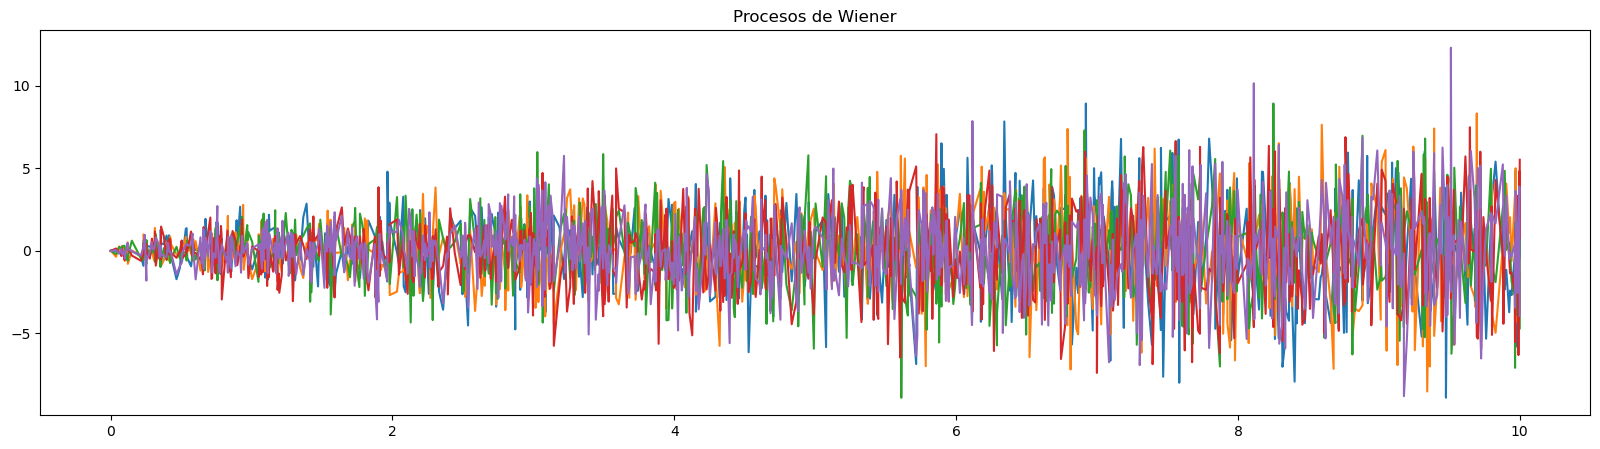

In [9]:
plt.figure(figsize=(20, 5))

for i in range(0,5): #5 simulaciones
    
    W = np.zeros(n)
    for i in range(1,n):
        W[i] = Wiener(t[i])
    
    plt.plot(t,W)
    
plt.title("Procesos de Wiener")
plt.show()